In [17]:
#FORECASTING =Predicting Something with respect to time
#Regression = Predicting something with respect to other
# FORECASTING = Vegetable Prices
# 1 Quintals = 100 kg
# 1 ton = 1000 kg
# FB PROPHET( Facebook ) = Tool/Library used here

In [18]:
#1 . Take the dataset and create Dataframe
import pandas as pd
df = pd.read_html('DailyWiseMarketArrivals.html')[-1]
print(df)

             Date     Market  Arrival(q) Price Minimum (Rs/q)  \
0     01/Jan/2005  BANGALORE        6823                  440   
1     03/Jan/2005  BANGALORE        5046                  400   
2     05/Jan/2005  BANGALORE        6413                  420   
3     06/Jan/2005  BANGALORE        7496                  440   
4     07/Jan/2005  BANGALORE        9625                  410   
...           ...        ...         ...                  ...   
4184  08/Jul/2022  BANGALORE       10550                 2600   
4185  11/Jul/2022  BANGALORE       15870                 2600   
4186  14/Sep/2022  BANGALORE        9220                 1600   
4187  17/Sep/2022  BANGALORE       13200                 1600   
4188          NaN      Total    41438323             955(Avg)   

     Price Maximum (Rs/q) Modal Price (Rs/q)  
0                     580                510  
1                     560                500  
2                     560                500  
3                     550      

In [19]:
df.shape

(4189, 6)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4188 non-null   object
 1   Market                4189 non-null   object
 2   Arrival(q)            4189 non-null   int64 
 3   Price Minimum (Rs/q)  4189 non-null   object
 4   Price Maximum (Rs/q)  4189 non-null   object
 5   Modal Price (Rs/q)    4189 non-null   object
dtypes: int64(1), object(5)
memory usage: 196.5+ KB


In [21]:
df.size

25134

In [22]:
df.describe()

,Arrival(q)
count,4.189000e+03
mean,1.978435e+04
std,6.401165e+05
min,1.350000e+02
25%,6.872000e+03
50%,8.819000e+03
75%,1.130600e+04
max,4.143832e+07


In [23]:
#Let us check the numm values present in the dataframe
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [24]:
#Drop the numm value
df = df.dropna()

In [25]:
df.isnull().sum()

Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [26]:
#FB Prophet = This accepts data only from 2 columns - 1.ds(Relative to time), 2.y (Relative to price)
#So let us rename the date column as dt and the price column as y
df = df.rename(columns= {'Modal Price (Rs/q)' : 'y',  'Date' : 'ds'})
print(df)

               ds     Market  Arrival(q) Price Minimum (Rs/q)  \
0     01/Jan/2005  BANGALORE        6823                  440   
1     03/Jan/2005  BANGALORE        5046                  400   
2     05/Jan/2005  BANGALORE        6413                  420   
3     06/Jan/2005  BANGALORE        7496                  440   
4     07/Jan/2005  BANGALORE        9625                  410   
...           ...        ...         ...                  ...   
4183  04/Jun/2022  BANGALORE        9670                 2400   
4184  08/Jul/2022  BANGALORE       10550                 2600   
4185  11/Jul/2022  BANGALORE       15870                 2600   
4186  14/Sep/2022  BANGALORE        9220                 1600   
4187  17/Sep/2022  BANGALORE       13200                 1600   

     Price Maximum (Rs/q)     y  
0                     580   510  
1                     560   500  
2                     560   500  
3                     550   500  
4                     460   425  
...            

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4188 entries, 0 to 4187
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ds                    4188 non-null   object
 1   Market                4188 non-null   object
 2   Arrival(q)            4188 non-null   int64 
 3   Price Minimum (Rs/q)  4188 non-null   object
 4   Price Maximum (Rs/q)  4188 non-null   object
 5   y                     4188 non-null   object
dtypes: int64(1), object(5)
memory usage: 229.0+ KB


In [31]:
#Create a new dataframe with only the 2 columns(ds and y)
df1 = df[['ds','y']]
print(df1)

               ds     y
0     01/Jan/2005   510
1     03/Jan/2005   500
2     05/Jan/2005   500
3     06/Jan/2005   500
4     07/Jan/2005   425
...           ...   ...
4183  04/Jun/2022  2400
4184  08/Jul/2022  2700
4185  11/Jul/2022  2700
4186  14/Sep/2022  1800
4187  17/Sep/2022  1800

[4188 rows x 2 columns]


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4188 non-null   object
 1   y       4188 non-null   object
dtypes: object(2)
memory usage: 98.2+ KB


In [34]:
# Here the data is in string/object format,  
# So we will convert the ds to datetime format,  
# And we will convert the y to integer format
df1['ds'] = pd.to_datetime(df1['ds'])
df1['y'] = df1['y'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4188 non-null   datetime64[ns]
 1   y       4188 non-null   int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 81.8 KB


C:\Users\Dryunicorn\AppData\Local\Temp\ipykernel_43188\1158385690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ds'] = pd.to_datetime(df1['ds'])
C:\Users\Dryunicorn\AppData\Local\Temp\ipykernel_43188\1158385690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y'] = df1['y'].astype(int)


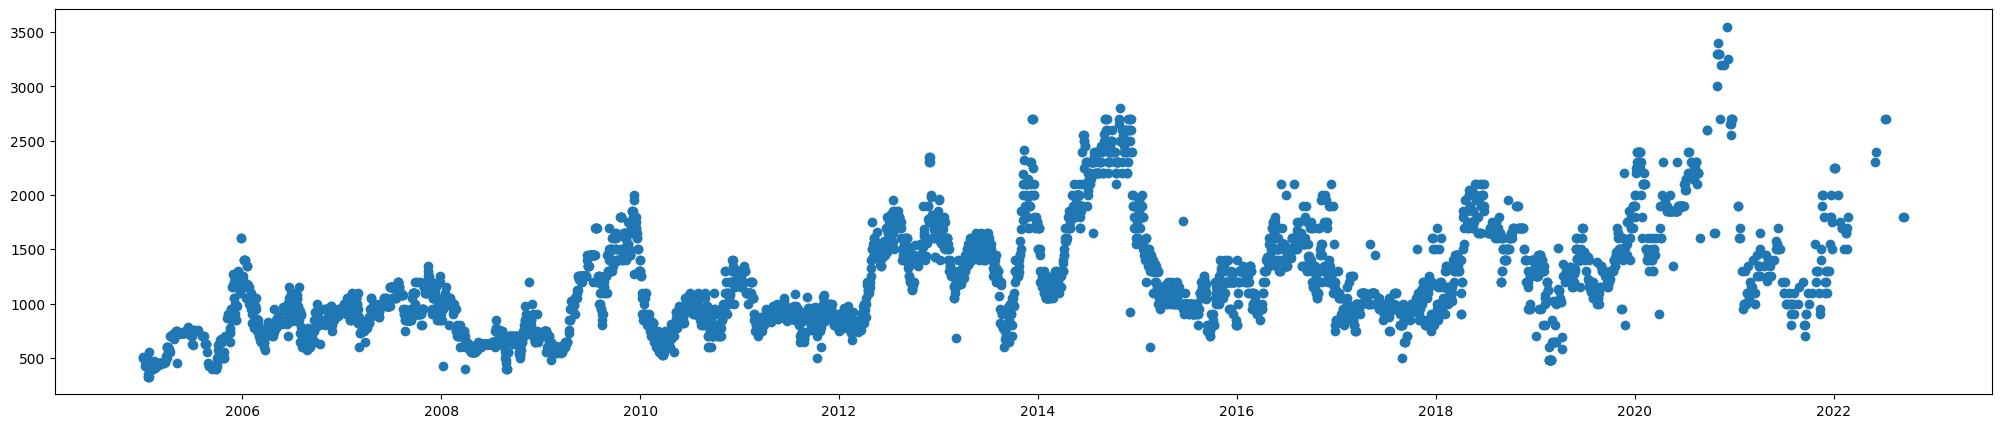

In [35]:
#VISUALISATION
import matplotlib.pyplot as plt
plt.figure(figsize=[25,5])
plt.scatter(df1['ds'],df1['y'])

In [36]:
#FB PROPHET
import prophet
op = prophet.Prophet()
op.fit(df1)

Importing plotly failed. Interactive plots will not work.
19:18:02 - cmdstanpy - INFO - Chain [1] start processing
19:18:03 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
forecast = op.make_future_dataframe(periods=365, freq='D')
forecast = op.predict(forecast)

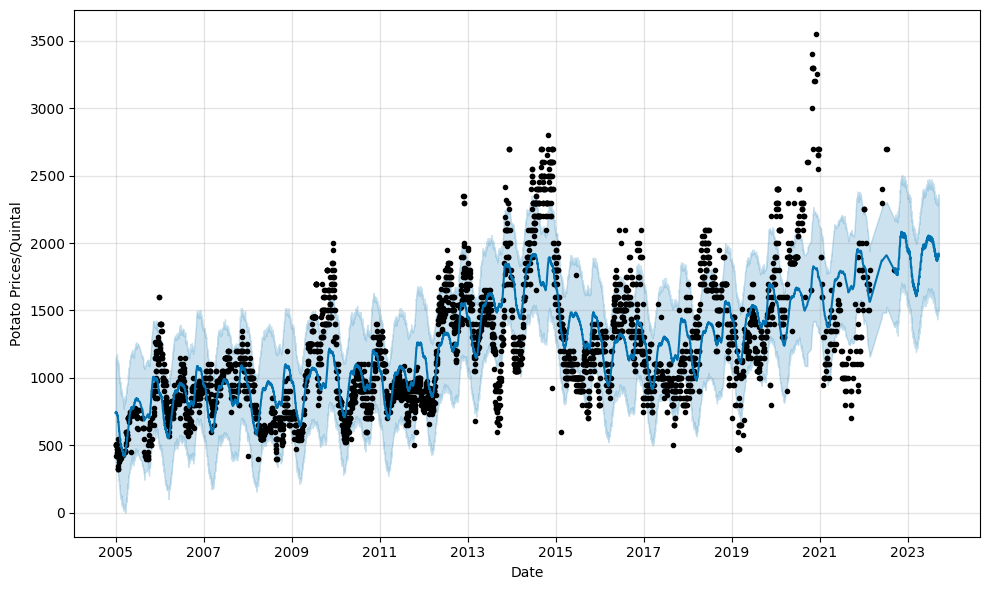

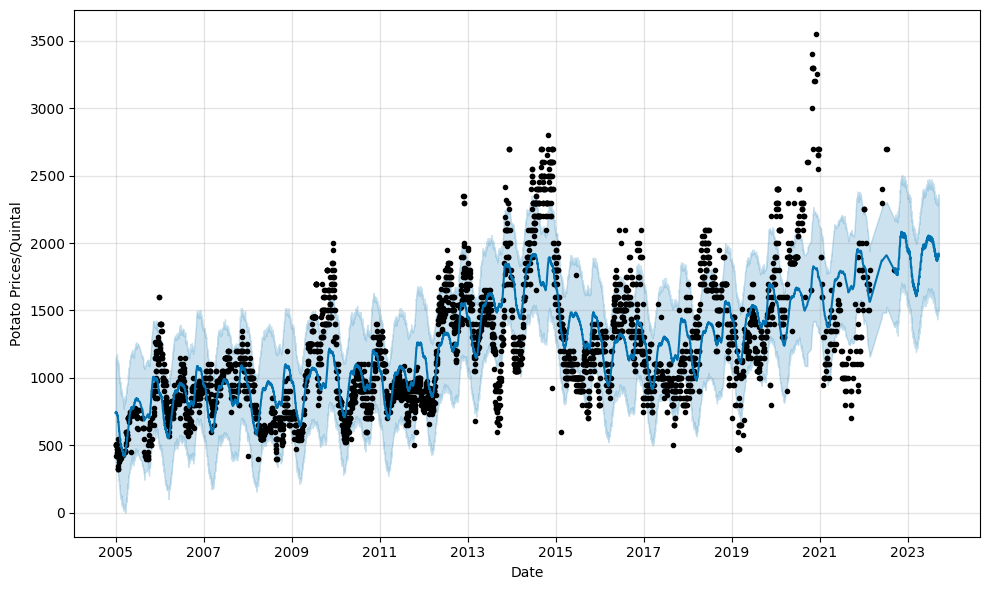

In [38]:
#Visualisation
#THe Black Dots are the actual values of potato from 1st jan 2005-17 september 2022
# THe Blue shade is - Minimum and the maximum values of potato prices a predictd by our model.
# the Dark blue line is the best fit line of the model.
op.plot(forecast, xlabel= 'Date', ylabel='Potato Prices/Quintal')